In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.simplefilter("ignore")
from unidecode import unidecode

In [2]:
df = pd.read_excel("Tabela 1612.xlsx")

In [3]:
df["Município"] = df["Município"].str[:-5]

In [4]:
df["Município"] = df["Município"].fillna(method = 'ffill')

In [ ]:
df["Município"] = df["Município"].apply(lambda x: unidecode(x).lower().title())

In [6]:
df = df.replace("-", np.nan)
df = df.replace("X", np.nan)
df = df.replace("...", np.nan)
df = df.replace("..", np.nan)

In [7]:
df.shape[0]

10935

In [8]:
df = df[df['Rendimento médio da produção (Quilogramas por Hectare)'].notna()]

In [9]:
df.groupby("Município").sum(numeric_only=True).sort_values(by = 'Quantidade produzida (Toneladas)', ascending = False)

,Ano,Área plantada (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais)
Município,,,,,,
Tupancireta,44275.0,3030518.0,3028318.0,7415324.0,53411.0,7980437.0
Palmeira Das Missoes,44275.0,2090400.0,2090400.0,5420846.0,57120.0,5919752.0
Cruz Alta,44275.0,1907100.0,1903630.0,4855859.0,55594.0,5353706.0
Julio De Castilhos,44275.0,1830900.0,1830700.0,4592080.0,54611.0,5316596.0
Cachoeira Do Sul,44275.0,1907912.0,1903062.0,4382068.0,48339.0,4958090.0
...,...,...,...,...,...,...
Santa Tereza,8014.0,15.0,15.0,19.0,5133.0,10.0
Picada Cafe,16124.0,8.0,8.0,16.0,16000.0,17.0
Harmonia,6009.0,9.0,9.0,12.0,3999.0,8.0


In [10]:
df.rename({
    'Área plantada (Hectares)': 'area_plantada(ha)',
    'Área colhida (Hectares)': 'area_colhida(ha)',
    'Quantidade produzida (Toneladas)': 'producao(t)',
    'Rendimento médio da produção (Quilogramas por Hectare)': 'produtividade(kg/ha)',
    'Valor da produção (Mil Reais)':  'valor_mil(R$)'
}, axis = 1, inplace = True)

Calcular a diferença entre áreas plantadas e colhidas

In [11]:
df["delta_area"] = df['area_plantada(ha)'] - df['area_colhida(ha)']

Calcular o valor médio da saca de soja

In [12]:
df['valor_saca'] = (df['valor_mil(R$)'] / ((df['producao(t)'] / 60))).round(2)

In [13]:
df.head()

,Município,Ano,area_plantada(ha),area_colhida(ha),producao(t),produtividade(kg/ha),valor_mil(R$),delta_area,valor_saca
0,Acegua,2002.0,100.0,100.0,126.0,1260.0,55.0,0.0,26.19
1,Acegua,2003.0,750.0,750.0,945.0,1260.0,624.0,0.0,39.62
2,Acegua,2004.0,750.0,750.0,945.0,1260.0,650.0,0.0,41.27
3,Acegua,2005.0,2000.0,2000.0,480.0,240.0,204.0,0.0,25.50
4,Acegua,2006.0,2000.0,2000.0,2400.0,1200.0,920.0,0.0,23.00


In [14]:
mer = df[['Município', 'Ano', 'area_plantada(ha)',
       'area_colhida(ha)', 'delta_area', 'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)', 'valor_saca']]

In [15]:
mer.to_csv("soja_IBGE_RS_munic.csv")

# Tudo tratado? Comece daqui.

In [2]:
mer = pd.read_csv("soja_IBGE_RS_munic.csv")

In [3]:
mer["var_produtividade"] = mer["produtividade(kg/ha)"].diff()
mer["var_produtividade_%"] = mer["produtividade(kg/ha)"].pct_change()
mer["var_producao(t)"] = mer["produtividade(kg/ha)"].diff()
mer["var_producao(t)_%"] = mer["produtividade(kg/ha)"].pct_change()

# Importar as variáveis climátivas

# Upload do histórico da variação da temperatura média da superfícia do Oceano Pacífico

Os eventos de El Nino e La nina ocorrem quando há 5 ocorrências de temperaturas 0,5 acima (El Niño) ou abaixo (La Niña) do padrão. Os dados disponíveis nesse dataset

Estudos mostraram que uma condição necessária para o desenvolvimento e persistência da convecção profunda (aumento da nebulosidade e da precipitação) nos Trópicos é que a temperatura da superfície do mar (SST) local seja de 28 °C ou superior. Uma vez que o padrão de convecção profunda é alterado devido a SSTs anômalas, a circulação atmosférica tropical e subtropical se ajusta ao novo padrão de aquecimento tropical, resultando em padrões anômalos de precipitação e temperatura que se estendem muito além da região do Pacífico equatorial. Uma anomalia de SST de +0,5 °C na região do Niño 3.4 é suficiente para atingir esse limite entre o final de março e meados de junho. Durante o restante do ano, uma anomalia de SST maior, chegando a +1,5 °C nos meses de novembro, dezembro e janeiro, é necessária para atingir o limiar que sustenta a convecção profunda persistente nessa região.

In [4]:
enso = pd.read_excel("Temp_media_2010_2025.xlsx")

### Aplicando os ajustes para fazer a fusão entre as bases do IBGE e do NOOA

In [5]:
enso.rename(columns = {"Year": "Ano"}, inplace = True)

In [6]:
mer = mer[mer['Ano'].notna()]

In [7]:
mer["Ano"] = mer["Ano"].astype(int)

In [8]:
mer = mer.merge(enso[["Ano", 'Media_mar_jun', 'Dez', 'Media_semestre_1',
       'Media_semestre_2','Evento_mar_jun', 'Evento_nov_dez_jan']], on = "Ano", how = "inner")

In [9]:
""" 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

mer['Evento_mar_jun_num'] = le.fit_transform(mer['Evento_mar_jun'])
mer['Evento_nov_dez_jan_num'] = le.fit_transform(mer['Evento_nov_dez_jan'])
"""

" \nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nmer['Evento_mar_jun_num'] = le.fit_transform(mer['Evento_mar_jun'])\nmer['Evento_nov_dez_jan_num'] = le.fit_transform(mer['Evento_nov_dez_jan'])\n"

In [10]:
mer.groupby('Evento_mar_jun').sum(numeric_only=True)

,Unnamed: 0,Ano,area_plantada(ha),area_colhida(ha),delta_area,producao(t),produtividade(kg/ha),valor_mil(R$),valor_saca,var_produtividade,var_produtividade_%,var_producao(t),var_producao(t)_%,Media_mar_jun,Dez,Media_semestre_1,Media_semestre_2
Evento_mar_jun,,,,,,,,,,,,,,,,,
El nino,6886721,2524891,16571436.0,16518088.0,53348.0,50408275.0,3838257.0,55072812.0,81958.67,179013.0,88.684052,179013.0,88.684052,885.625,1036.8,1076.350000,800.783333
La nina,8961488,3313868,20375104.0,20201450.0,173654.0,49188327.0,4019356.0,97313867.0,180991.11,-177035.0,209.514647,-177035.0,209.514647,-1306.125,-1439.7,-1516.433333,-1191.516667
Neutro,33088154,12177220,68542657.0,67859270.0,683387.0,151197411.0,13206560.0,148061893.0,323924.10,362.0,1525.113009,362.0,1525.113009,-87.100,627.4,-216.700000,667.916667


In [11]:
prec = pd.read_csv("media_pluviometrica_RS.csv", sep = ";")

In [12]:
prec.rename({"Estacao": "Município"}, axis = 1, inplace = True)

In [13]:
mer = mer.merge(prec, on = ["Ano", "Município"], how = "left")
mer.rename({'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': "precipitacao_media"}, axis = 1, inplace = True)

In [14]:
coord = pd.read_csv(r"C:\Users\DellVostro\OneDrive\Documentos\XP\Projeto_aplicado\Enso\Shapefiles\municipios.csv")

In [15]:
coord.rename({"nome": "Município"}, axis = 1, inplace = True)
coord["Município"] = coord["Município"].apply(lambda x: unidecode(x).lower().title())

In [16]:
mer = mer.merge(coord[['Município', 'latitude', 'longitude']], on= 'Município', how = 'inner')

In [17]:
import numpy
munic = np.array(mer["Município"])
ano = np.array(mer['Ano'])
latitudes = np.array(mer["latitude"])
longitudes = np.array(mer["longitude"])
pluviosidade = np.array(mer["precipitacao_media"])

In [18]:
from sklearn.cluster import DBSCAN


# Dados de coordenadas
coords = np.column_stack([latitudes, longitudes])

# Clusterização por proximidade (ajuste 'eps' para definir a distância máxima)
clustering = DBSCAN(eps=0.3, min_samples=2).fit(coords)
labels = clustering.labels_

# Atribuir a pluviosidade média do cluster a cada município
df_1 = pd.DataFrame({'lat': latitudes, 'lon': longitudes, "Ano": ano, "Município": munic, 'pluv': pluviosidade, 'cluster': labels})
df_1['pluv_media_cluster'] = df_1.groupby(['Ano', 'cluster'])['pluv'].transform('mean')

In [19]:
df_1[df_1["Ano"] == 2020]

,lat,lon,Ano,Município,pluv,cluster,pluv_media_cluster
18,-31.8665,-54.1615,2020,Acegua,NaN,0,NaN
40,-28.1672,-52.0310,2020,Agua Santa,NaN,1,770.52
56,-29.6447,-53.2515,2020,Agudo,NaN,1,770.52
78,-28.2342,-53.7757,2020,Ajuricaba,NaN,1,770.52
100,-27.6579,-54.7649,2020,Alecrim,NaN,1,770.52
...,...,...,...,...,...,...,...
9593,-27.3686,-53.4919,2020,Vista Alegre,NaN,1,770.52
9615,-28.8052,-51.7947,2020,Vista Alegre Do Prata,NaN,1,770.52
9637,-27.2902,-53.6974,2020,Vista Gaucha,NaN,1,770.52
9659,-28.3516,-54.5040,2020,Vitoria Das Missoes,NaN,1,770.52


In [20]:
df_1_g = df_1.groupby("Ano").mean(numeric_only=True)

In [21]:
df_1 = df_1.merge(df_1_g, on = "Ano")

In [22]:
df_1.columns

Index(['lat_x', 'lon_x', 'Ano', 'Município', 'pluv_x', 'cluster_x',
       'pluv_media_cluster_x', 'lat_y', 'lon_y', 'pluv_y', 'cluster_y',
       'pluv_media_cluster_y'],
      dtype='object')

In [23]:
df_1['pluv_media_cluster_x'].fillna(df_1['pluv_media_cluster_y'], inplace = True)

In [24]:
df_1 = df_1.rename(columns=lambda x: x.replace('_x', '') if x.endswith('_x') else x)

In [25]:
cols_to_drop = df_1.filter(regex='_y$').columns
df_1 = df_1.drop(columns=cols_to_drop)

In [26]:
mer.shape[0]

9684

In [30]:
mer = mer.merge(df_1[['Ano', "Município", 'pluv_media_cluster']])

In [31]:
mer["precipitacao_media"].fillna(mer["pluv_media_cluster"], inplace = True)

In [32]:
mer.drop_duplicates(["Município", "Ano"], inplace = True)

In [33]:
mer["delta_area(%)"] = mer['delta_area'] / mer["area_plantada(ha)"]

In [35]:
mer['Media_mar_jun_y-1'] = mer['Media_mar_jun'].shift(1)
mer['Dez_y-1'] = mer['Dez'].shift(1)
mer['Media_semestre_1_y-1'] = mer['Media_semestre_1'].shift(1)
mer['Media_semestre_2_y-1'] = mer['Media_semestre_2'].shift(1)

In [36]:
mer

,Unnamed: 0,Município,Ano,area_plantada(ha),area_colhida(ha),delta_area,producao(t),produtividade(kg/ha),valor_mil(R$),valor_saca,...,Evento_nov_dez_jan,precipitacao_media,latitude,longitude,pluv_media_cluster,delta_area(%),Media_mar_jun_y-1,Dez_y-1,Media_semestre_1_y-1,Media_semestre_2_y-1
0,0,Acegua,2002,100.0,100.0,0.0,126.0,1260.0,55.0,26.19,...,Neutro,797.502959,-31.8665,-54.1615,797.502959,0.0,NaN,NaN,NaN,NaN
1,1,Acegua,2003,750.0,750.0,0.0,945.0,1260.0,624.0,39.62,...,Neutro,941.955301,-31.8665,-54.1615,941.955301,0.0,0.350,1.1,0.216667,1.050000
2,2,Acegua,2004,750.0,750.0,0.0,945.0,1260.0,650.0,41.27,...,Neutro,529.405932,-31.8665,-54.1615,529.405932,0.0,-0.025,0.4,0.233333,0.283333
3,3,Acegua,2005,2000.0,2000.0,0.0,480.0,240.0,204.0,25.50,...,Neutro,949.802601,-31.8665,-54.1615,949.802601,0.0,0.225,0.7,0.266667,0.650000
4,4,Acegua,2006,2000.0,2000.0,0.0,2400.0,1200.0,920.0,23.00,...,Neutro,454.423034,-31.8665,-54.1615,454.423034,0.0,0.300,-0.8,0.400000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14043,10908,Westfalia,2020,50.0,50.0,0.0,75.0,1500.0,110.0,88.00,...,Neutro,770.520000,-29.4263,-51.7645,770.520000,0.0,0.600,0.5,0.633333,0.316667
14044,10909,Westfalia,2021,50.0,50.0,0.0,165.0,3300.0,444.0,161.45,...,Neutro,888.378947,-29.4263,-51.7645,888.378947,0.0,0.050,-1.2,0.200000,-0.933333
14045,10910,Westfalia,2022,50.0,50.0,0.0,116.0,2320.0,359.0,185.69,...,Neutro,1024.227273,-29.4263,-51.7645,1024.227273,0.0,-0.600,-1.0,-0.716667,-0.733333
14046,10911,Westfalia,2023,130.0,130.0,0.0,281.0,2162.0,632.0,134.95,...,El nino,1775.326316,-29.4263,-51.7645,1775.326316,0.0,-1.000,-0.8,-0.983333,-0.900000


In [37]:
mer[mer['delta_area'] != 0][["Ano", "area_plantada(ha)", "area_colhida(ha)", "delta_area", "delta_area(%)"]].sort_values(by = "delta_area(%)", ascending=False)

,Ano,area_plantada(ha),area_colhida(ha),delta_area,delta_area(%)
10770,2005,300.0,15.0,285.0,0.950000
6594,2022,20400.0,2040.0,18360.0,0.900000
5463,2005,900.0,90.0,810.0,0.900000
11917,2012,7000.0,700.0,6300.0,0.900000
9673,2005,1650.0,200.0,1450.0,0.878788
...,...,...,...,...,...
5645,2022,6450.0,6438.0,12.0,0.001860
4173,2005,17000.0,16970.0,30.0,0.001765
6511,2005,8080.0,8070.0,10.0,0.001238
6891,2023,53000.0,52950.0,50.0,0.000943


In [39]:
nino = mer[(mer["Evento_mar_jun"] == "El nino") | (mer["Evento_mar_jun"] == "Neutro")]
nina = mer[(mer["Evento_mar_jun"] == "La nina") | (mer["Evento_mar_jun"] == "Neutro")]

In [40]:
#mer.to_excel("tabela_completa_analise.xlsx")

In [41]:
mer = mer[mer["Ano"] != 2002]

In [42]:
mer_init = mer.copy()

In [43]:
mer = mer[['area_plantada(ha)', 'area_colhida(ha)',
       'delta_area', 'delta_area(%)', 'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)',
       'valor_saca', 'var_produtividade', 'var_produtividade_%',
       'var_producao(t)', 'var_producao(t)_%', 'Media_mar_jun', 'Dez',
       'Media_semestre_1', 'Media_semestre_2', 'Media_mar_jun_y-1', 'Dez_y-1',
       'Media_semestre_1_y-1', 'Media_semestre_2_y-1',
        'precipitacao_media']]

# Verificando as variáveis que mais influenciam na variância com o PCA

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
mer = mer[mer["produtividade(kg/ha)"].notna()]
mer = mer[mer["valor_mil(R$)"].notna()]

In [46]:
X_PCA = mer[['area_colhida(ha)', 'delta_area', 'produtividade(kg/ha)',
       'valor_saca', 'Media_mar_jun', 'Dez', 'Media_mar_jun_y-1', 'Dez_y-1', 'Media_semestre_1',
       'Media_semestre_2','precipitacao_media']]  # ou escolha colunas específicas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_PCA)

pca = PCA(n_components=2) #número de componentes
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())  # total de variância explicada

df_final = pd.concat([mer.reset_index(drop=True), df_pca], axis=1)
componentes_df = pd.DataFrame(
    pca.components_,
    columns=X_PCA.columns,
    index=["PC1", "PC2"]
)
for pc in componentes_df.index:
    print(f"\nVariáveis mais influentes em {pc}:")
    print(componentes_df.loc[pc].sort_values(ascending=False).head(5))

[0.28740875 0.22296599]
0.5103747319732346

Variáveis mais influentes em PC1:
Media_mar_jun       0.544706
Media_semestre_1    0.527862
Dez_y-1             0.427440
Media_semestre_2    0.255828
Dez                 0.245818
Name: PC1, dtype: float64

Variáveis mais influentes em PC2:
Dez                   0.525255
Media_semestre_2      0.513748
precipitacao_media    0.309660
valor_saca            0.173681
area_colhida(ha)      0.029240
Name: PC2, dtype: float64


### Aplicando métodos de aprendizando de máquina, começando pela regressão linear

In [542]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [543]:
X = nino[['Media_mar_jun']] #variável independente
y = nino[['precipitacao_media']] #variável dependente

In [544]:
X.shape

(7307, 1)

In [545]:
y.shape

(7307, 1)

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = X)

In [547]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [548]:
y_pred = modelo.predict(X_test)

In [549]:
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

R²: 0.08
RMSE: 363.57


### arvore de decisao

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_text

### Influência das variações de temperatura do oceâno pacífico no regime de precipitação

#### Média entre março e junho e precipitação média

In [551]:
X = nino[['Media_mar_jun']]  # variáveis explicativas
y = nino["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)


R²: 0.399
RMSE: 292.40
|--- Media_mar_jun <= 0.33
|   |--- Media_mar_jun <= -0.21
|   |   |--- Media_mar_jun <= -0.30
|   |   |   |--- Media_mar_jun <= -0.34
|   |   |   |   |--- value: [1157.80]
|   |   |   |--- Media_mar_jun >  -0.34
|   |   |   |   |--- value: [1089.07]
|   |   |--- Media_mar_jun >  -0.30
|   |   |   |--- value: [452.93]
|   |--- Media_mar_jun >  -0.21
|   |   |--- Media_mar_jun <= 0.04
|   |   |   |--- Media_mar_jun <= -0.09
|   |   |   |   |--- value: [1536.00]
|   |   |   |--- Media_mar_jun >  -0.09
|   |   |   |   |--- value: [1248.74]
|   |   |--- Media_mar_jun >  0.04
|   |   |   |--- Media_mar_jun <= 0.06
|   |   |   |   |--- value: [758.78]
|   |   |   |--- Media_mar_jun >  0.06
|   |   |   |   |--- value: [1108.46]
|--- Media_mar_jun >  0.33
|   |--- Media_mar_jun <= 0.76
|   |   |--- Media_mar_jun <= 0.65
|   |   |   |--- Media_mar_jun <= 0.48
|   |   |   |   |--- value: [1311.66]
|   |   |   |--- Media_mar_jun >  0.48
|   |   |   |   |--- value: [1343.26]

#### Média nov-dez-jan e precipitação média

In [552]:
X = mer[['Dez']] # variáveis explicativas
y = mer["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.454
RMSE: 257.00
|--- Dez <= 1.25
|   |--- Dez <= 0.85
|   |   |--- Dez <= 0.75
|   |   |   |--- Dez <= -1.40
|   |   |   |   |--- value: [1206.57]
|   |   |   |--- Dez >  -1.40
|   |   |   |   |--- value: [1089.80]
|   |   |--- Dez >  0.75
|   |   |   |--- value: [1246.06]
|   |--- Dez >  0.85
|   |   |--- value: [452.69]
|--- Dez >  1.25
|   |--- Dez <= 1.80
|   |   |--- value: [1535.51]
|   |--- Dez >  1.80
|   |   |--- Dez <= 2.30
|   |   |   |--- value: [1743.07]
|   |   |--- Dez >  2.30
|   |   |   |--- value: [1539.69]



In [553]:
mer.columns

Index(['area_plantada(ha)', 'area_colhida(ha)', 'delta_area', 'delta_area(%)',
       'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)', 'valor_saca',
       'var_produtividade', 'var_produtividade_%', 'var_producao(t)',
       'var_producao(t)_%', 'Media_mar_jun', 'Dez', 'Media_semestre_1',
       'Media_semestre_2', 'Media_mar_jun_y-1', 'Dez_y-1',
       'Media_semestre_1_y-1', 'Media_semestre_2_y-1', 'precipitacao_media'],
      dtype='object')

####  Árvore de decisão - Precipitação média e produtividade

In [554]:
X = nino[['precipitacao_media']] # variáveis explicativas
y = nino["produtividade(kg/ha)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.528
RMSE: 609.91
|--- precipitacao_media <= 959.50
|   |--- precipitacao_media <= 948.05
|   |   |--- precipitacao_media <= 823.80
|   |   |   |--- precipitacao_media <= 540.20
|   |   |   |   |--- value: [1617.77]
|   |   |   |--- precipitacao_media >  540.20
|   |   |   |   |--- value: [1885.72]
|   |   |--- precipitacao_media >  823.80
|   |   |   |--- precipitacao_media <= 944.73
|   |   |   |   |--- value: [2320.54]
|   |   |   |--- precipitacao_media >  944.73
|   |   |   |   |--- value: [1584.19]
|   |--- precipitacao_media >  948.05
|   |   |--- precipitacao_media <= 950.46
|   |   |   |--- precipitacao_media <= 949.05
|   |   |   |   |--- value: [633.24]
|   |   |   |--- precipitacao_media >  949.05
|   |   |   |   |--- value: [811.16]
|   |   |--- precipitacao_media >  950.46
|   |   |   |--- precipitacao_media <= 952.56
|   |   |   |   |--- value: [1592.49]
|   |   |   |--- precipitacao_media >  952.56
|   |   |   |   |--- value: [1758.33]
|--- precipitacao_media >  95

In [555]:
#### Média mar-jun e produtividade

In [556]:
X = mer[['Media_mar_jun_y-1']] # variáveis explicativas
y = mer["produtividade(kg/ha)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.279
RMSE: 756.22
|--- Media_mar_jun_y-1 <= 0.65
|   |--- Media_mar_jun_y-1 <= -0.48
|   |   |--- Media_mar_jun_y-1 <= -0.79
|   |   |   |--- Media_mar_jun_y-1 <= -0.96
|   |   |   |   |--- value: [2154.24]
|   |   |   |--- Media_mar_jun_y-1 >  -0.96
|   |   |   |   |--- value: [2056.70]
|   |   |--- Media_mar_jun_y-1 >  -0.79
|   |   |   |--- Media_mar_jun_y-1 <= -0.62
|   |   |   |   |--- value: [1592.14]
|   |   |   |--- Media_mar_jun_y-1 >  -0.62
|   |   |   |   |--- value: [1679.33]
|   |--- Media_mar_jun_y-1 >  -0.48
|   |   |--- Media_mar_jun_y-1 <= 0.15
|   |   |   |--- Media_mar_jun_y-1 <= 0.00
|   |   |   |   |--- value: [2424.49]
|   |   |   |--- Media_mar_jun_y-1 >  0.00
|   |   |   |   |--- value: [3028.34]
|   |   |--- Media_mar_jun_y-1 >  0.15
|   |   |   |--- Media_mar_jun_y-1 <= 0.33
|   |   |   |   |--- value: [1933.72]
|   |   |   |--- Media_mar_jun_y-1 >  0.33
|   |   |   |   |--- value: [2181.67]
|--- Media_mar_jun_y-1 >  0.65
|   |--- Media_mar_jun_y-1 <= 0.7

#### Média nov-dez-jan e produtividade

In [557]:
X = mer[['Dez']] # variáveis explicativas
y = mer["produtividade(kg/ha)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.338
RMSE: 724.68
|--- Dez <= -0.90
|   |--- Dez <= -1.10
|   |   |--- Dez <= -1.40
|   |   |   |--- value: [2470.73]
|   |   |--- Dez >  -1.40
|   |   |   |--- value: [1973.85]
|   |--- Dez >  -1.10
|   |   |--- value: [3150.41]
|--- Dez >  -0.90
|   |--- Dez <= -0.75
|   |   |--- value: [1214.66]
|   |--- Dez >  -0.75
|   |   |--- Dez <= 2.30
|   |   |   |--- Dez <= 0.85
|   |   |   |   |--- value: [2461.99]
|   |   |   |--- Dez >  0.85
|   |   |   |   |--- value: [2032.84]
|   |   |--- Dez >  2.30
|   |   |   |--- value: [2982.44]



In [558]:
X = mer[['Media_mar_jun']] # variáveis explicativas
y = mer["delta_area(%)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R²: 0.194
RMSE: 0.06
|--- Media_mar_jun <= 0.26
|   |--- Media_mar_jun <= -0.96
|   |   |--- value: [0.03]
|   |--- Media_mar_jun >  -0.96
|   |   |--- Media_mar_jun <= -0.48
|   |   |   |--- Media_mar_jun <= -0.79
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Media_mar_jun >  -0.79
|   |   |   |   |--- value: [0.00]
|   |   |--- Media_mar_jun >  -0.48
|   |   |   |--- Media_mar_jun <= -0.34
|   |   |   |   |--- value: [0.01]
|   |   |   |--- Media_mar_jun >  -0.34
|   |   |   |   |--- value: [0.00]
|--- Media_mar_jun >  0.26
|   |--- Media_mar_jun <= 0.33
|   |   |--- value: [0.12]
|   |--- Media_mar_jun >  0.33
|   |   |--- Media_mar_jun <= 0.76
|   |   |   |--- Media_mar_jun <= 0.65
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Media_mar_jun >  0.65
|   |   |   |   |--- value: [0.01]
|   |   |--- Media_mar_jun >  0.76
|   |   |   |--- value: [0.00]



In [ ]:
condicoes = [mer['Dez_y-1'] <= -1.2,
             (mer['Media_mar_jun_y-1             "La nina forte",'] > -1.2) & (mer['Dez_y-1'] <= -0.5),
             (mer['Dez_y-1'] >= -0.5) & (mer['Dez_y-1'] < 0.5),
             (mer['Dez_y-1'] >= 0.5) & (mer['Dez_y-1'] < 1.2),
             (mer['Dez_y-1'] >= 1.2)
             ]

resultados = [
            "La nina forte",
             "La nina moderado",
            "Neutro",
            "El nino moderado",
            "El nino forte"
            ]

mer["Faixa_Dez_y-1"] = np.select(condicoes, resultados, default="NA")

In [581]:
mer.columns

Index(['area_plantada(ha)', 'area_colhida(ha)', 'delta_area', 'delta_area(%)',
       'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)', 'valor_saca',
       'var_produtividade', 'var_produtividade_%', 'var_producao(t)',
       'var_producao(t)_%', 'Media_mar_jun', 'Dez', 'Media_semestre_1',
       'Media_semestre_2', 'Media_mar_jun_y-1', 'Dez_y-1',
       'Media_semestre_1_y-1', 'Media_semestre_2_y-1', 'precipitacao_media',
       'Faixa_Dez_y-1'],
      dtype='object')

In [584]:
mer[["Faixa_Dez_y-1", 'produtividade(kg/ha)']].groupby("Faixa_Dez_y-1").mean(numeric_only=True)

,produtividade(kg/ha)
Faixa_Dez_y-1,
El nino forte,2710.693364
El nino moderado,2296.442427
La nina forte,2712.430223
La nina moderado,2270.830662
Neutro,2250.585570


In [48]:
condicoes = [mer['Media_mar_jun_y-1'] <= -1.2,
             (mer['Media_mar_jun_y-1'] > -1.2) & (mer['Media_mar_jun_y-1'] <= -0.5),
             (mer['Media_mar_jun_y-1'] >= -0.5) & (mer['Media_mar_jun_y-1'] < 0.5),
             (mer['Media_mar_jun_y-1'] >= 0.5) & (mer['Media_mar_jun_y-1'] < 1.2),
             (mer['Media_mar_jun_y-1'] >= 1.2)
             ]

resultados = [
             "La nina forte",       
             "La nina moderado",
            "Neutro",
            "El nino moderado",
            "El nino forte"
            ]

mer["Faixa_Media_mar_jun_y-1"] = np.select(condicoes, resultados, default="NA")

In [47]:
condicoes = [mer['Dez_y-1'] <= -1.2,
             (mer['Dez_y-1'] > -1.2) & (mer['Dez_y-1'] <= -0.5),
             (mer['Dez_y-1'] >= -0.5) & (mer['Dez_y-1'] < 0.5),
             (mer['Dez_y-1'] >= 0.5) & (mer['Dez_y-1'] < 1.2),
             (mer['Dez_y-1'] >= 1.2)
             ]

resultados = [
             "La nina forte",       
             "La nina moderado",
            "Neutro",
            "El nino moderado",
            "El nino forte"
            ]

mer["Faixa_Dez_y-1"] = np.select(condicoes, resultados, default="NA")

In [49]:
mer["Faixa_Dez_y-1"].unique()

array(['El nino moderado', 'Neutro', 'La nina moderado', 'La nina forte',
       'El nino forte'], dtype=object)

In [52]:
condicoes = [(mer['Dez_y-1']  <= -0.5) & (mer['Media_mar_jun_y-1'] <= 0.5),
             (mer['Dez_y-1']  >= 0.5) & (mer['Media_mar_jun_y-1'] >= 0.5)
             ]

resultados = [
             "La nina",       
             "El nino"
            ]

mer["Faixa_geral"] = np.select(condicoes, resultados, default="Neutro")

In [58]:
mer[['Faixa_geral', 'precipitacao_media', 'produtividade(kg/ha)', 'delta_area']].groupby("Faixa_geral").mean(numeric_only=True)

,precipitacao_media,produtividade(kg/ha),delta_area
Faixa_geral,,,
El nino,1002.404622,2488.927033,48.488038
La nina,1117.243134,2296.286688,96.624386
Neutro,1220.219135,2438.355703,123.823992


In [56]:
mer[['Faixa_geral', 'produtividade(kg/ha)']].groupby("Faixa_geral").mean(numeric_only=True)

,produtividade(kg/ha)
Faixa_geral,
El nino,2488.927033
La nina,2296.286688
Neutro,2438.355703


In [ ]:
mer[['Faixa_geral', 'produtividade(kg/ha)']].groupby("Faixa_geral").mean(numeric_only=True)

In [587]:
mer[["Faixa_Media_mar_jun_y-1", 'produtividade(kg/ha)']].groupby("Faixa_Media_mar_jun_y-1").mean(numeric_only=True)

,produtividade(kg/ha)
Faixa_Media_mar_jun_y-1,
El nino moderado,2769.458833
La nina moderado,1873.966525
Neutro,2444.439922


# Vamos testar o Random Forest para tentar pegar relações mais complexas

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
mer_prec = mer.drop_duplicates("precipitacao_media")

In [72]:
mer.columns

Index(['area_plantada(ha)', 'area_colhida(ha)', 'delta_area', 'delta_area(%)',
       'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)', 'valor_saca',
       'var_produtividade', 'var_produtividade_%', 'var_producao(t)',
       'var_producao(t)_%', 'Media_mar_jun', 'Dez', 'Media_semestre_1',
       'Media_semestre_2', 'Media_mar_jun_y-1', 'Dez_y-1',
       'Media_semestre_1_y-1', 'Media_semestre_2_y-1', 'precipitacao_media',
       'Faixa_Dez_y-1', 'Faixa_Media_mar_jun_y-1', 'Faixa_geral_La nina',
       'Faixa_geral_Neutro'],
      dtype='object')

In [70]:
mer = pd.get_dummies(mer, columns=['Faixa_geral'], drop_first=True)

In [86]:
X = mer[[ 'Dez_y-1',
       'Media_semestre_1_y-1', 'Media_semestre_2_y-1']] # variáveis explicativas
y = mer['precipitacao_media'] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train) 

y_pred = forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.905
RMSE: 106.96


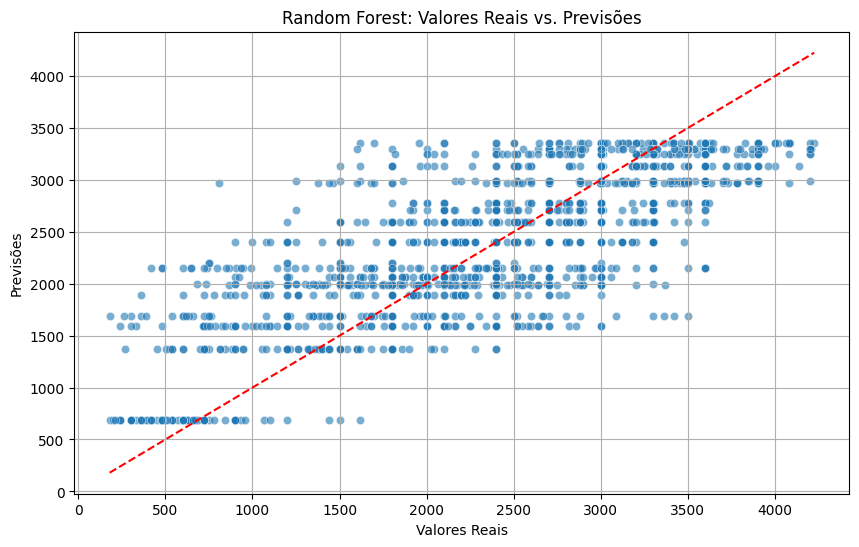

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Random Forest: Valores Reais vs. Previsões")
plt.grid(True)
plt.show()

### Criar DataFrame de cenários (usando a média mar-jun como variável)

In [443]:
X = mer[['Dez_y-1']] # variáveis explicativas
y = mer["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train) 

y_pred = forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.507
RMSE: 244.24


In [87]:
cenarios_dez = pd.DataFrame({
    "Cenario": ["El Nino Forte", "El Nino Moderado", "Neutro", "La Niña Moderado", "La Niña Forte"],
      'Dez_y-1': [2.0, 1.2, 0.0, -1.2, -2.0],
       'Media_semestre_1_y-1': [2.0, 1.2, 0.0, -1.2, -2.0],
        'Media_semestre_2_y-1': [2.0, 1.2, 0.0, -1.2, -2.0]
})

# Gerar previsões
cenarios_dez["Precipitacao_Prevista"] = forest.predict(cenarios_dez[['Dez_y-1',
       'Media_semestre_1_y-1', 'Media_semestre_2_y-1']])

# Mostrar resultados
print(cenarios_dez[["Cenario", "Dez_y-1", "Precipitacao_Prevista"]])

            Cenario  Dez_y-1  Precipitacao_Prevista
0     El Nino Forte      2.0            1470.483242
1  El Nino Moderado      1.2            1470.483242
2            Neutro      0.0            1534.627261
3  La Niña Moderado     -1.2             947.495211
4     La Niña Forte     -2.0             947.495211


In [378]:
mer.columns

Index(['area_plantada(ha)', 'area_colhida(ha)', 'delta_area', 'delta_area(%)',
       'producao(t)', 'produtividade(kg/ha)', 'valor_mil(R$)', 'valor_saca',
       'var_produtividade', 'var_produtividade_%', 'var_producao(t)',
       'var_producao(t)_%', 'Media_mar_jun', 'Dez', 'Media_semestre_1',
       'Media_semestre_2', 'Media_mar_jun_y-1', 'Dez_y-1',
       'Media_semestre_1_y-1', 'Media_semestre_2_y-1', 'precipitacao_media'],
      dtype='object')

### Usando a média semestre_1_y-1

In [577]:
X = mer[['Dez_y-1']] # variáveis explicativas
y = mer["precipitacao_media"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train) 

y_pred = forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.507
RMSE: 244.24


In [ ]:
cenarios_dez = pd.DataFrame({
    "Cenario": ["El Nino Forte", "El Nino Moderado", "Neutro", "La Niña Moderado", "La Niña Forte"],
    "Dez_y-1": [2.0, 1.2, 0.0, -1.2, -2.0]
})

# Gerar previsões
cenarios_dez["Precipitacao_Prevista"] = forest.predict(cenarios_dez[["Dez_y-1"]])

# Mostrar resultados
print(cenarios_dez[["Cenario", "Dez_y-1", "Precipitacao_Prevista"]])

            Cenario  Dez_y-1  Precipitacao_Prevista
0     El Nino Forte      2.0            1068.703042
1  El Nino Moderado      1.2             946.036025
2            Neutro      0.0            1286.708296
3  La Niña Moderado     -1.2             895.025575
4     La Niña Forte     -2.0            1087.231503


### Comparação com o dataset original para testar o modelo por município

In [88]:
mer_init = mer_init[mer_init["valor_saca"].notna()]

In [89]:
munic = mer_init[["Município"]]

In [90]:
teste = pd.concat([munic, mer], axis = 1)

In [91]:
mer.head()

,area_plantada(ha),area_colhida(ha),delta_area,delta_area(%),producao(t),produtividade(kg/ha),valor_mil(R$),valor_saca,var_produtividade,var_produtividade_%,...,Media_semestre_2,Media_mar_jun_y-1,Dez_y-1,Media_semestre_1_y-1,Media_semestre_2_y-1,precipitacao_media,Faixa_Dez_y-1,Faixa_Media_mar_jun_y-1,Faixa_geral_La nina,Faixa_geral_Neutro
1,750.0,750.0,0.0,0.0,945.0,1260.0,624.0,39.62,0.0,0.000000,...,0.283333,0.350,1.1,0.216667,1.050000,941.955301,El nino moderado,Neutro,False,True
2,750.0,750.0,0.0,0.0,945.0,1260.0,650.0,41.27,0.0,0.000000,...,0.650000,-0.025,0.4,0.233333,0.283333,529.405932,Neutro,Neutro,False,True
3,2000.0,2000.0,0.0,0.0,480.0,240.0,204.0,25.50,-1020.0,-0.809524,...,-0.333333,0.225,0.7,0.266667,0.650000,949.802601,El nino moderado,Neutro,False,True
4,2000.0,2000.0,0.0,0.0,2400.0,1200.0,920.0,23.00,960.0,4.000000,...,0.583333,0.300,-0.8,0.400000,-0.333333,454.423034,La nina moderado,Neutro,True,False
5,2000.0,2000.0,0.0,0.0,3160.0,1580.0,2054.0,39.00,380.0,0.316667,...,-1.150000,-0.275,0.9,-0.466667,0.583333,1089.175398,El nino moderado,Neutro,False,True


In [496]:
X = mer[['Media_mar_jun_y-1']] # variáveis explicativas
y = mer["produtividade(kg/ha)"] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train) 

y_pred = forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.905
RMSE: 106.96


In [493]:
teste["precipitacao_media_prevista"] = teste_dez_1

In [ ]:
teste["Faixa_Media_semestre_2_y-1"].unique()

array(['El nino moderado', 'Neutro', 'La nina moderado', 'La nina forte',
       'El nino forte'], dtype=object)

In [ ]:
teste[["Faixa_Media_semestre_2_y-1", "precipitacao_media_prevista"]].groupby("Media_semestre_2_y-1").mean(numeric_only=True)

,precipitacao_media_prevista
Media_semestre_2_y-1,
El nino forte,1225.381557
El nino moderado,1192.016393
La nina forte,1087.231503
La nina moderado,1142.725068
Neutro,1134.137377


In [461]:
cenario = teste.forest.predict(teste[["Dez_y-1"]])

AttributeError: 'DataFrame' object has no attribute 'forest'

In [ ]:
cenarios_dez = pd.DataFrame({
    "Cenario": ["El Nino Forte", "El Nino Moderado", "Neutro", "La Niña Moderado", "La Niña Forte"],
    "Dez_y-1": [2.0, 1.2, 0.0, -1.2, -2.0]
})

# Gerar previsões
cenarios_dez["produtividade(kg/ha)"] = forest.predict(cenarios_dez[["Dez_y-1"]])

# Mostrar resultados
print(cenarios_dez[["Cenario", "Dez_y-1", "produtividade(kg/ha)"]])

            Cenario  Dez_y-1  produtividade(kg/ha)
0     El Nino Forte      2.0           2196.045437
1  El Nino Moderado      1.2           2403.357048
2            Neutro      0.0           2709.428453
3  La Niña Moderado     -1.2           3295.590754
4     La Niña Forte     -2.0           2385.606074


In [392]:
mer.head()

,area_plantada(ha),area_colhida(ha),delta_area,delta_area(%),producao(t),produtividade(kg/ha),valor_mil(R$),valor_saca,var_produtividade,var_produtividade_%,...,var_producao(t)_%,Media_mar_jun,Dez,Media_semestre_1,Media_semestre_2,Media_mar_jun_y-1,Dez_y-1,Media_semestre_1_y-1,Media_semestre_2_y-1,precipitacao_media
1,750.0,750.0,0.0,0.0,945.0,1260.0,624.0,39.62,0.0,0.000000,...,0.000000,-0.025,0.4,0.233333,0.283333,0.350,1.1,0.216667,1.050000,941.955301
2,750.0,750.0,0.0,0.0,945.0,1260.0,650.0,41.27,0.0,0.000000,...,0.000000,0.225,0.7,0.266667,0.650000,-0.025,0.4,0.233333,0.283333,529.405932
3,2000.0,2000.0,0.0,0.0,480.0,240.0,204.0,25.50,-1020.0,-0.809524,...,-0.809524,0.300,-0.8,0.400000,-0.333333,0.225,0.7,0.266667,0.650000,949.802601
4,2000.0,2000.0,0.0,0.0,2400.0,1200.0,920.0,23.00,960.0,4.000000,...,4.000000,-0.275,0.9,-0.466667,0.583333,0.300,-0.8,0.400000,-0.333333,454.423034
5,2000.0,2000.0,0.0,0.0,3160.0,1580.0,2054.0,39.00,380.0,0.316667,...,0.316667,-0.325,-1.6,-0.066667,-1.150000,-0.275,0.9,-0.466667,0.583333,1089.175398


In [389]:
cenarios_dez = pd.DataFrame({
    "Cenario": ["El Nino Moderado", "Neutro", "La Niña Moderado"],
    "Dez_y-1": [1.2, 0.0, -1.2]
})

# Gerar previsões
cenarios_dez["Precipitacao_Prevista"] = forest.predict(cenarios_dez[["Dez_y-1"]])

# Mostrar resultados
print(cenarios_dez[["Cenario", "Dez_y-1", "Precipitacao_Prevista"]])

            Cenario  Dez_y-1  Precipitacao_Prevista
0  El Nino Moderado      1.2             946.036025
1            Neutro      0.0            1286.708296
2  La Niña Moderado     -1.2             895.025575


In [230]:
importances = tree.feature_importances_
df_importancia = pd.DataFrame({
    "variavel": X.columns,
    "importancia": importances
}).sort_values(by="importancia", ascending=False)

print(df_importancia)

           variavel  importancia
2  Media_semestre_1     0.656440
3  Media_semestre_2     0.171553
1               Dez     0.138176
0     Media_mar_jun     0.033831


#### Influência das variações de temperatura do oceâno pacífico na produtividade da soja

In [232]:
mer = mer[mer['produtividade(kg/ha)'].notna()]

R²: -0.065
RMSE: 843.03


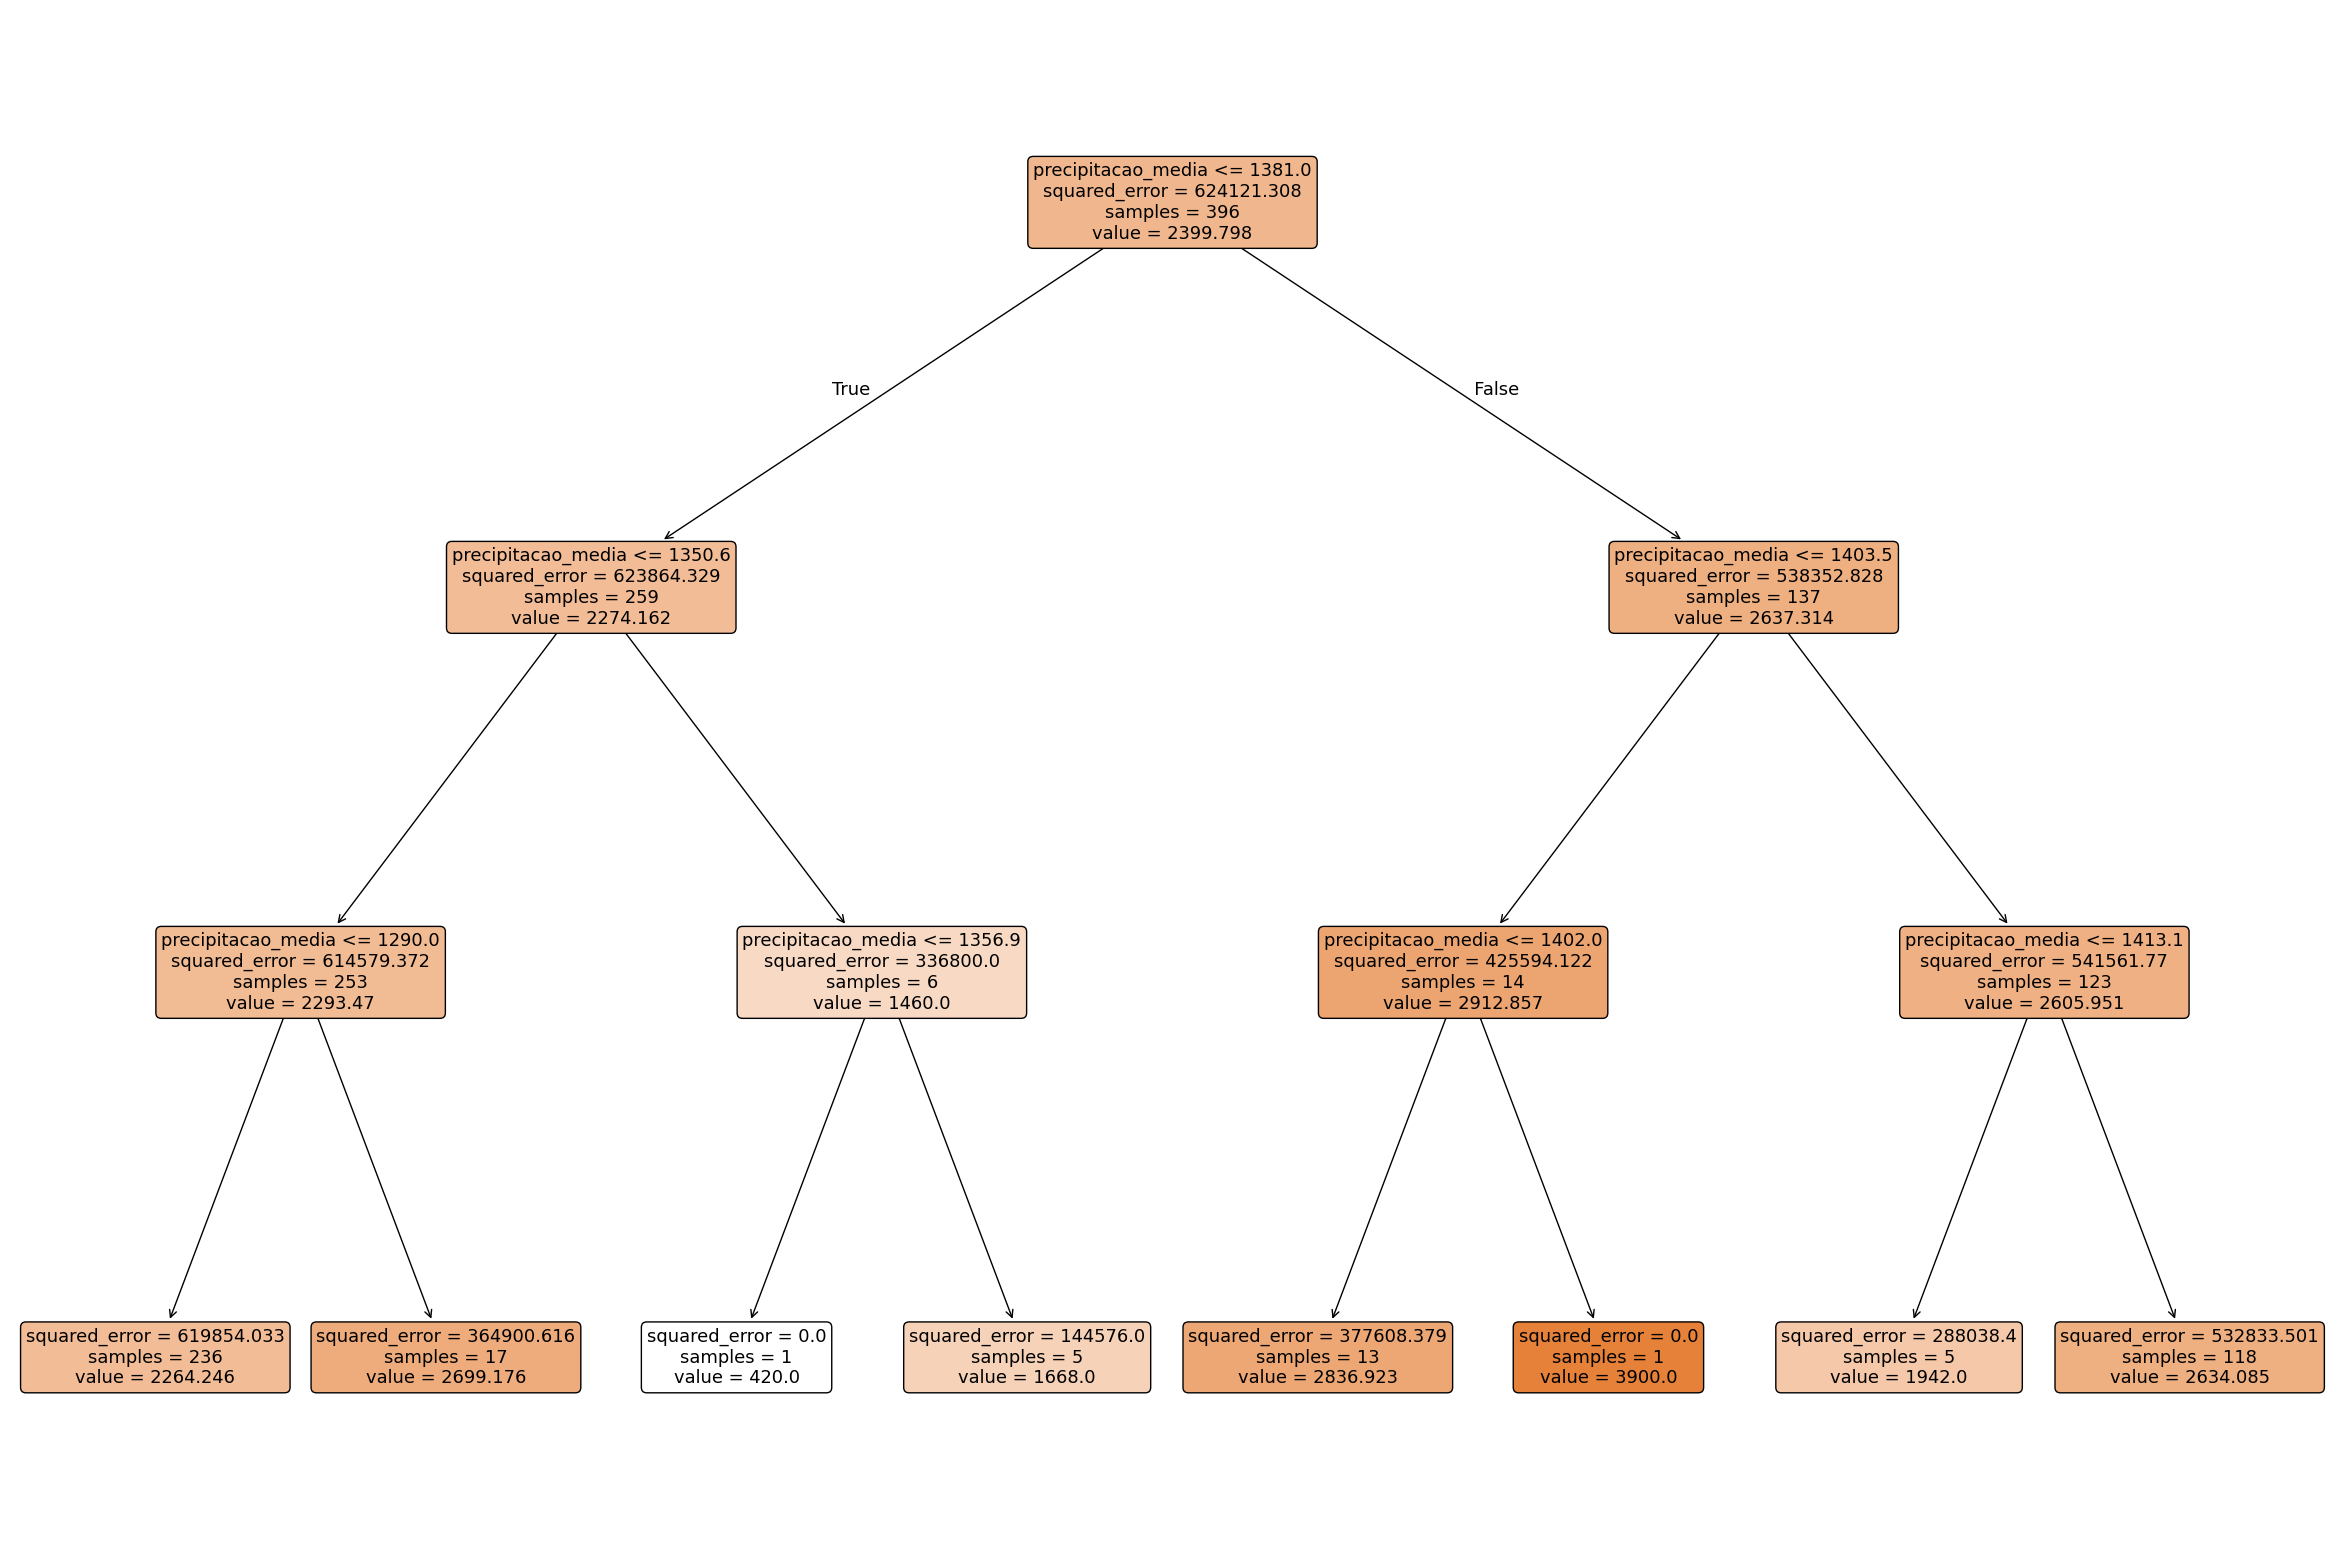

             variavel  importancia
0  precipitacao_media          1.0


In [439]:
X = mer[['precipitacao_media']]
y = mer['produtividade(kg/ha)']                 # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(30, 20))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

importances = tree.feature_importances_
df_importancia = pd.DataFrame({
    "variavel": X.columns,
    "importancia": importances
}).sort_values(by="importancia", ascending=False)

print(df_importancia)

In [440]:
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)


|--- precipitacao_media <= 1381.00
|   |--- precipitacao_media <= 1350.60
|   |   |--- precipitacao_media <= 1290.00
|   |   |   |--- value: [2264.25]
|   |   |--- precipitacao_media >  1290.00
|   |   |   |--- value: [2699.18]
|   |--- precipitacao_media >  1350.60
|   |   |--- precipitacao_media <= 1356.90
|   |   |   |--- value: [420.00]
|   |   |--- precipitacao_media >  1356.90
|   |   |   |--- value: [1668.00]
|--- precipitacao_media >  1381.00
|   |--- precipitacao_media <= 1403.50
|   |   |--- precipitacao_media <= 1402.00
|   |   |   |--- value: [2836.92]
|   |   |--- precipitacao_media >  1402.00
|   |   |   |--- value: [3900.00]
|   |--- precipitacao_media >  1403.50
|   |   |--- precipitacao_media <= 1413.10
|   |   |   |--- value: [1942.00]
|   |   |--- precipitacao_media >  1413.10
|   |   |   |--- value: [2634.08]



In [ ]:
mer.to_excel("")

<class 'pandas.core.frame.DataFrame'>
Index: 8951 entries, 0 to 11787
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_plantada(ha)     8951 non-null   float64
 1   area_colhida(ha)      8951 non-null   float64
 2   delta_area            8951 non-null   float64
 3   producao(t)           8951 non-null   float64
 4   produtividade(kg/ha)  8951 non-null   float64
 5   valor_mil(R$)         8949 non-null   float64
 6   valor_saca            8949 non-null   float64
 7   var_produtividade     8950 non-null   float64
 8   var_produtividade_%   8950 non-null   float64
 9   var_producao(t)       8950 non-null   float64
 10  var_producao(t)_%     8950 non-null   float64
 11  Media_mar_jun         8951 non-null   float64
 12  Dez                   8951 non-null   float64
 13  Media_semestre_1      8951 non-null   float64
 14  Media_semestre_2      8951 non-null   float64
 15  precipitacao_media    895